# Résolution des équations mouvements dans un potentiel cental par la méthode de Runge-Kutta 4

## Système Terre-Lune

Les équations de mouvement de la Lune autour de la Terre en coordonnées cartésiennes sont données à partir de l'équation Newton dans lev référentiel du centre de masse:

\begin{equation}
\frac{\partial^2 \vec{r}}{\partial t^2} = -\frac{G(M_{T}+m_{L})\vec{r}}{|\vec{r}|^3}                          
\end{equation}

Cette équation peut être décomposée selon les composantes $x$ et $y$:

\begin{equation}
\frac{\partial^2 x}{\partial t^2} = -\frac{G(M_{T}+m_{L})}{|\vec{r}|^3}x                          
\end{equation}
\begin{equation}
\frac{\partial^2 y}{\partial t^2} = -\frac{G(M_{T}+m_{L})}{|\vec{r}|^3}y                          
\end{equation}

Où $|\vec{r}| = \sqrt{x^2+y^2}$ , $G=6,67408.10^{-11}m^3/kg.s^{2}$ la constante gravitationnelle, $M_{T}=5,972.10^{24} kg$ la masse de la Terre, $m_{L}=3,348.10^{22} kg$ la masse de la Lune.



Les équations du mouvement peuvent aussi être retrouvées en coordonnée polaire. 
Pour ce faire considérons, le lagrangien suivant:

\begin{equation}
L = T - U = \frac{1}{2}(\dot{r}^2 + r^2\dot{\theta}^2) +  \frac{G(M_T+m_L)}{r}                         
\end{equation}

Les équations du mouvement sont donc donnée par 

\begin{equation}
\ddot{r} - r\dot{\theta}^2 + \frac{G(M_T+m_L)}{r^2} = 0                          
\end{equation}
\begin{equation}
\frac{\partial (r^2 \dot{\theta})}{\partial t} =  2r\dot{r}\dot{\theta} + r^2 \ddot{\theta} = 0                        
\end{equation}

La deuxième équation de Lagrange implique directement la conservation du moment angulaire $l=r^2 \dot{\theta}$ en substituant $\dot{\theta}$ dans la première équation de Lagrange par $\dot{\theta} = \frac{l}{r^2}$ et en posant $k = G(M_T+m_L)$, on obtient l'équation:

\begin{equation}
\ddot{r} - \frac{l^2}{r^3} + \frac{k}{r^2} = 0                         
\end{equation}

En multipliant cette équation par  $\dot{r}$, on peut faire apparaitre la quantité $E= \frac{1}{2}\ddot{r}^2 + \frac{1}{2} \frac{l^2}{r^2} - \frac{k}{r}$ qui est l'énergie du système et on trouve que l'énergie est conservée au cour du temps, $\frac{\partial  E}{\partial t} = 0$.

A partir de l'énergie, on obtient que:

\begin{equation}
dt = \frac{dr}{\sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}}                         
\end{equation}

Or on sais que $ dt = \frac{r^2 d\theta}{l}$, et on a donc:

\begin{equation}
d \theta = \frac{l dr}{r^2 \sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}}                         
\end{equation}

En intégrant cette équation et on posant $u = \frac{1}{r}$, on obtient l'intégral:

\begin{equation}
\theta = \int \frac{l dr}{r^2 \sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}} = - \int \frac{du}{\sqrt{\frac{2E}{l^2} - \frac{2k}{l^2}u - u^2}}                    
\end{equation}

Cette intégral peut être directement calculer et on obtient que:

\begin{equation}
\theta = -arcos(\frac{u - C}{eC}) + \theta'                   
\end{equation}

Avec $e = \sqrt{ 1 + \frac{2 l^2 E}{K^2} }$ et $ C = \frac{k}{l^2}$.

En supposant que $r$ soit minimal lorsque $\theta - \theta' = 0 $, on a que $ r_{min} = \frac{1}{C(e + 1)} $. De plus, on a que $ \frac{l^2}{k} = r_{min}(1 + e) $. 

On obtient donc l'équation de la trajéctoire:

\begin{equation}
r(\theta) = \frac{r_{min}(1 + e)}{1 + e cos \theta}                   
\end{equation}


Vérifions que cette équation nous renvois bien une éllipse où $e$ est l'éxcentricité qui vaut 0,0549006 et $r_{min}= 362600000$

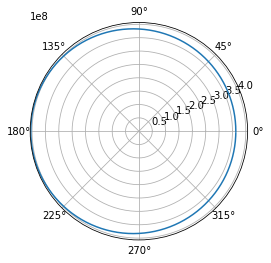

In [19]:
from math import cos, pi, fabs, sqrt, acos
import matplotlib.pyplot as plt

def r(theta):                                                    #ceci correspond à la formule théorique pour r(theta)
     return (362600000*(1+0.0549006))/(1+0.0549006*cos(theta))

theta = [t * pi / 180 for t in range(0,360)]  #création d'une liste contenant les valeurs de theta en radians avec un step=1

rvalues = [fabs(r(t)) for t in theta]       #calcul des valeurs de r grâce à la fonction précédente et de la liste theta
                                            #il faut prendre la valeur absolue de r(t) car r va de 0 à + infini
    
plt.polar(theta, rvalues)                   #création d'un graphique en coordonnées polaires

plt.show()

L'elipse que l'on obient, avec une excentricité de 0.0549006, est tres proche du cerlce, le cercle ayant une excentricité nulle.

Pour intégrer les équations du mouvement qui sont du second ordre, il faut transformer chaque équation du second en deux équation du premier. Afin d'utiliser l'olgorithme de Runge-Kutta, chaque équation sera intégrée une fois puis une seconde fois. Les équations en coordonnées cartésiennes deviennent:

\begin{aligned}
&\frac{\partial x}{\partial t} = v_{x}  \\                 
&\frac{\partial v_{x}}{\partial t} =  -\frac{GM_{T}m_{L}}{|\vec{r}|^3}x \\                
&\frac{\partial y}{\partial t} = v_{y}  \\               
&\frac{\partial v_{y}}{\partial t} =  -\frac{GM_{T}m_{L}}{|\vec{r}|^3}y  \\               
\end{aligned}

Et pour les équations en coordonnée polaires:
\begin{aligned}
&\frac{\partial r}{\partial t} = v_{r}  \\                 
&\frac{\partial v_{r}}{\partial t} =  r\dot{\theta}^2 - \frac{GM_T}{r^2} \\                
&\frac{\partial y}{\partial t} = v_{\theta}  \\               
&\frac{\partial v_{\theta}}{\partial t} = \frac{-2 \dot{r}\dot{\theta}}{r}   \\               
\end{aligned}


Pour des raisons de facilité, la trajectoire de la lune sera calculée en coordonnée polaire.

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt

def integrate(F,x,y,xStop,dt):
    def Rk4(F,x,y,dt):
        K0 = dt*F(x,y)
        K1 = dt*F(x+dt/2.0, y+K0/2.0)
        K2 = dt*F(x+dt/2.0,y+K1/2.0)  
        K3 = dt*F(x+dt,y+K2)
        return (K0+2.0*K1+2.0*K2+K3)/6.0
    X= []
    Y= []
    X.append(x)
    Y.append(y)
    i=0
    while Y[i][2] < 2*np.pi :                                             #Y[i][2] < 2*pi     x < xStop
        y=y+Rk4(F,x,y,dt)
        x=x+dt
        X.append(x)
        Y.append(y)
        i=i+1
    return np.array(X),np.array(Y)

def F(x,y):                                                 #la fonction correspondant au problème Terre Lune est défini
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[0]*(y[3]**2) - 4.0348017e14/(y[0]**2)          # 4.0348017e14 provient de G*(MasseTerre+MasseLune)
    F[2] = y[3]
    F[3] = -2.0*y[1]*y[3]/y[0]
    return F

x=0.0
xStop = 2419200.0
dt=10
y = np.array([362600000.0, 0.0, 0.0, 0.00000298786])

X,Y =integrate(F,x,y,xStop,dt)
print(len(Y))


235043


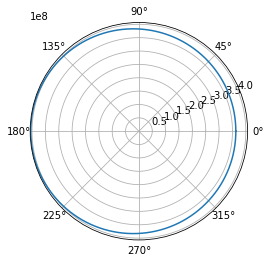

In [11]:
plt.polar(Y[:,2], Y[:,0])     #Le centre du graphique représente la Terre, les coordonnées Y[:,2] sont les r de la trajectoire 
                              #de la lune et les Y[:,0] les théta
plt.show()

Nous obtenons donc bien la même elispe prédite par la formule théorique.


Nous souhaitons ensuite vérifier l'excentricité "e" de l'elipse que forme la trajectoire de la lune autour de la Terre. Pour ce faire nous allons calculer "e" à partir de la formule \begin{equation}
r(\theta) = \frac{r_{min}(1 + e)}{1 + e cos \theta}                   
\end{equation} 
ce qui nous donne \begin{equation}
e = \frac{r(\theta)-r_{min}}{r_{min}-r(\theta)cos \theta}                   
\end{equation} 

pour chaque combinaison $r(\theta), cos  \theta$ que nous avons obtenu précedement. Il faudrat ensuite prendre la moyenne de toutes ces valeurs pour obtenir une approximation de l'excentricité.

In [23]:
avE =  0.0                                        #initialisation de la variable moyenne de l'excentricité "avE" à 0

for i in range (len(X)):                          #boucle calculant les moyennes pour chaque combinaison r,theta et 
                                                  #les sommants
    
    if (math.cos(Y[i][2])*Y[i][0]-362600000)!=0:  #nous avons du mettre cette condition suite à des messages d'erreur 
                                                  #de division par 0
            
        avE = avE + (362600000-Y[i][0])/(math.cos(Y[i][2])*Y[i][0]-362600000)
        
avE = avE/len(X)                                  #on divise la somme par le nombre d'éléments pour obtenir la moyenne
print(avE)

0.0548278701333


Nous obtenons une valeur relativement proche de la valeur théorique e=0.0549006 voulue. Le fait que l'on ait eu des erreurs de division par zéro signifie que quelques valeurs posent problèmes ce qui peut expliquer la différence entre notre valeur de e et celle voulue.

Pour trouver le demi grand axe il suffit simplement de sommer la distance Terre-Lune au périgé et à l'apogé et de la diviser par 2.

In [5]:
def demigrandaxe(Rmax,rmin):                  #Rmax représente le rayon par rapport à la Terre de la Lune à son apogée
                                              #et rmin à son périgé
    return (Rmax+rmin)/2
print(demigrandaxe(max(Y[:,0]),min(Y[:,0])))  #la fonction max retourne donc la plus grande valeur de r et min la plus petite            

388948397.804


Cette valeur est un peu éloignée de la valeur théorique que l'on obtient à partir de la formule pour r(theta), 
demi grand axe =, ce qui doit provenir du même problème rencontré lors du calcul de l'excentricité.

Le demi axe peut être calculé par la formule suivante:

\begin{equation}
b = \sqrt{a^2 - c^2} = \sqrt{a^2 - (a - r_{min})^2}                         
\end{equation}

où $a$ est le demi grand axe de l'élipse et $c$ la distance entre le foyer et le centre.

In [6]:
sqrt(388948397.80357337**2-(388948397.80357337-362600000.0)**2)

388054916.329057

Il y a encore une différence entre la valeur voulue,, et celle obtenue, mais on voit bien que les deux axes de l'elipse sont très proche en faisant quasiment un cercle.

Pour la durée de l'orbite, il suffit simplement de prendre la dernière valeur du tableau comptabilisant le temps.

In [7]:
X[i]

2414070.0

Ce qui convertie en seconde donne 27,94 jours ce qui est assez proche des 28 jours du cycle lunaire.

Nous voulons maintenant trouver la trajectoire et plus précisemment la position d'un astéroide passant entre la terre et la lune avec certaines conditions initiales. Nous allons donc utiliser le même code que précedement pour la trajectoire de la lune en remplacant les valeurs correspondant à la lune par celle de l'asteroide et celle de la terre par l'influence de la terre et de la lune. Nous avons réécrit la méthode Runge Kutta avec des coordonnées cartésiennes ce qui rendait les expressions plus simple dans ce cas ci.

20224240.0568
-1545754.43358


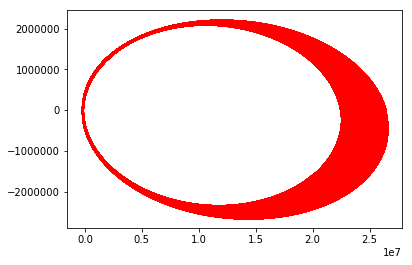

TypeError: only length-1 arrays can be converted to Python scalars

In [26]:
from math import asin


def integrate(F,x,y,xStop,dt):
    def Rk4(F,x,y,dt):
        K0 = dt*F(x,y)
        K1 = dt*F(x+dt/2.0, y+K0/2.0)
        K2 = dt*F(x+dt/2.0,y+K1/2.0)  
        K3 = dt*F(x+dt,y+K2)
        return (K0+2.0*K1+2.0*K2+K3)/6.0
    X= []
    Y= []
    X.append(x)
    Y.append(y)
    i=0
    while x < xStop:                                             #Y[i][2] < 2*pi     x < xStop
        y=y+Rk4(F,x,y,dt)
        x=x+dt
        X.append(x)
        Y.append(y)
        i=i+1
    return np.array(X),np.array(Y)
#np.array(X),np.array(Y)
def F(x,y):
    F = np.zeros(8)
    F[0] = y[1]
    F[1] = (-403480171584000.0*y[0])/(y[0]**2+y[2]**2)**(3/2)
    F[2] = y[3]
    F[3] = (-403480171584000.0*y[2])/(y[0]**2+y[2]**2)**(3/2)
    F[4] = y[5]
    F[5] = (-398576057600000.06*y[4])/(y[4]**2+y[6]**2)**(3/2) + (-4904113984000.0*y[4])/((y[4]-y[0])**2+(y[6]-y[2])**2)**(3/2)
    F[6] = y[7]
    F[7] = (-398576057600000.06*y[6])/(y[4]**2+y[6]**2)**(3/2) + (-4904113984000.0*y[6])/((y[4]-y[0])**2+(y[6]-y[2])**2)**(3/2)
    return F

x=0.0
xStop = 1209600
dt=1
y = np.array([415296795.608, 0.0, 0.0, -945.92057674938508, 26348397.80357337, -500, 0.0, 500])

X,Y =integrate(F,x,y,xStop,dt)

print(Y[-1][4])
print(Y[-1][6])

plt.scatter(Y[:,4], Y[:,6],c = 'red', s = 2)

#nodalAngle = acos(1./sqrt(3))
#plt.polar(2*[ nodalAngle], [0, 0.7], "r", 2*[ nodalAngle + pi], [0, 0.7], "r", \
          #2*[-nodalAngle], [0, 0.7], "r", 2*[-nodalAngle + pi], [0, 0.7], "r")

plt.show()

#plt.polar(((Y[:,2])**2+(Y[:,0])**2)**(1/2), asin(Y[:,0]/((Y[:,2])**2+(Y[:,0])**2)**(1/2)))     #Le centre du graphique représente la Terre, les coordonnées Y[:,2] sont les r de la trajectoire 
                              #de la lune et les Y[:,0] les théta
plt.show()

La dernière valeur dans le vecteur Y correspond donc à la position de l'astéroide après 14J.

Nous pouvons maintenant animer les trajectoires de la lune et de l'astéroide autour de la terre. Il faudrat le faire sur des graphiques séparés cependant, les echelles étant trop différentes.

In [42]:
from matplotlib import animation
from IPython.display import HTML
def integrate(F,x,y,xStop,dt):
    def Rk4(F,x,y,dt):
        K0 = dt*F(x,y)
        K1 = dt*F(x+dt/2.0, y+K0/2.0)
        K2 = dt*F(x+dt/2.0,y+K1/2.0)  
        K3 = dt*F(x+dt,y+K2)
        return (K0+2.0*K1+2.0*K2+K3)/6.0
    X= []
    Y= []
    X.append(x)
    Y.append(y)
    i=0
    while x < xStop:                                             #Y[i][2] < 2*pi     x < xStop
        y=y+Rk4(F,x,y,dt)
        x=x+dt
        X.append(x)
        Y.append(y)
        i=i+1
    return np.array(X),np.array(Y)
#np.array(X),np.array(Y)
def F(x,y):
    F = np.zeros(8)
    F[0] = y[1]
    F[1] = (-403480171584000.0*y[0])/(y[0]**2+y[2]**2)**(3/2)
    F[2] = y[3]
    F[3] = (-403480171584000.0*y[2])/(y[0]**2+y[2]**2)**(3/2)
    F[4] = y[5]
    F[5] = (-398576057600000.06*y[4])/(y[4]**2+y[6]**2)**(3/2) + (-4904113984000.0*y[4])/((y[4]-y[0])**2+(y[6]-y[2])**2)**(3/2)
    F[6] = y[7]
    F[7] = (-398576057600000.06*y[6])/(y[4]**2+y[6]**2)**(3/2) + (-4904113984000.0*y[6])/((y[4]-y[0])**2+(y[6]-y[2])**2)**(3/2)
    return F

x=0.0
xStop = 2419600
dt=1
y = np.array([415296795.608, 0.0, 0.0, -945.92057674938508, 26348397.80357337, -500, 0.0, 500])

X,Y =integrate(F,x,y,xStop,dt)

fig = plt.figure(figsize=(10,10))
plt.grid()
ax = plt.axes(xlim=(-415296795.608,415296795.6018),ylim=(-415296795.60,415296795.61))
points, = ax.plot([], [],'.',alpha = 1, markersize =10)
    
def animate(i):
    points.set_xdata(Y[i*1000][0])
    points.set_ydata(Y[i*1000][2])
    #ax.clear()
    #ax.plot(Y[i][0],Y[i][2])
    return points,
    

anim = animation.FuncAnimation(fig, animate,frames=2419, interval=5,blit=True)    #LUNE
#anim.save('patat.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())


fig = plt.figure(figsize=(10,10))
plt.grid()
ax = plt.axes(xlim=(-415296795.608,415296795.6018),ylim=(-415296795.60,415296795.61))
points, = ax.plot([], [],'.',alpha = 1, markersize =10)
    
def animate(i):
    points.set_xdata(Y[i*1000][0])
    points.set_ydata(Y[i*1000][2])
    #ax.clear()
    #ax.plot(Y[i][0],Y[i][2])
    return points,
    

anim = animation.FuncAnimation(fig, animate,frames=2419, interval=5,blit=True)   #ASTEROIDES
#anim.save('patat.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())


In [48]:

fig = plt.figure(figsize=(10,10))
plt.grid()
ax = plt.axes(xlim=(-496795.,35296795.6018),ylim=(-4296795.60,4296795.61))
points, = ax.plot([], [],'.',alpha = 1, markersize =10)
    
def animate(i):
    points.set_xdata(Y[i*200][4])
    points.set_ydata(Y[i*200][6])
    #ax.clear()
    #ax.plot(Y[i][0],Y[i][2])
    return points,
    

anim = animation.FuncAnimation(fig, animate,frames=5000, interval=30,blit=True)   #ASTEROIDES
#anim.save('patat.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())